In [1]:
#Import drive
from google.colab import drive
#Mount Google Drive
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
%cd drive/MyDrive/Colab Notebooks/Sebastian

/content/drive/MyDrive/Colab Notebooks/Sebastian


Stuff for commiting to Github below

In [ ]:
ROOT = '/content/drive"'

In [ ]:
from os.path import join  

# path to your project on Google Drive
MY_GOOGLE_DRIVE_PATH = 'drive/MyDrive/Colab Notebooks/Sebastian' 
# replace with your Github username 
GIT_USERNAME = "ahhuang007" 
# definitely replace with your
GIT_TOKEN = "new token"  
# Replace with your github repository in this case we want 
# to clone deep-learning-v2-pytorch repository
GIT_REPOSITORY = "Sebastian" 

PROJECT_PATH = join(ROOT, MY_GOOGLE_DRIVE_PATH)

# It's good to print out the value if you are not sure 
print("PROJECT_PATH: ", PROJECT_PATH)   

# In case we haven't created the folder already; we will create a folder in the project path     

#GIT_PATH = "https://{GIT_TOKEN}@github.com/{GIT_USERNAME}/{GIT_REPOSITORY}.git" this return 400 Bad Request for me
#GIT_PATH = "https://" + GIT_TOKEN + "@github.com/" + GIT_USERNAME + "/" + GIT_REPOSITORY + ".git"
#print("GIT_PATH: ", GIT_PATH)

PROJECT_PATH:  /content/drive"/drive/MyDrive/Colab Notebooks/Sebastian


In [22]:
!git add .

In [23]:
!git config --global user.email "ahhuang007@gmail.com"
!git config --global user.name "ahhuang007"

In [24]:
!git commit -m "testing model with even more increased penalty for deviation and roll_reward"

[main 5f42cf6] testing model with even more increased penalty for deviation and roll_reward
 8 files changed, 502081 insertions(+), 1 deletion(-)
 rewrite colab.ipynb (94%)
 create mode 100644 data/episode_rewards/ppo_cum_rewards_v19.csv
 create mode 100644 data/timestep_rewards/ppo_rewards_v19.csv
 create mode 100644 models/random_model_ppo_v19.zip
 create mode 100644 models/real_model_ppo_v19.zip


In [ ]:
!git remote set-url origin https://$git_key@github.com/ahhuang007/Sebastian.git

Had to reset the remote origin URL here, removed the code since it contained the personal authorization token. Now I set the git key as an environment variable.

--------

Command for pulling from github

In [27]:
!git pull origin

remote: Enumerating objects: 9, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 9 (delta 4), reused 9 (delta 4), pack-reused 0
Unpacking objects: 100% (9/9), done.
From https://github.com/ahhuang007/Sebastian
   5f42cf6..5d2cba2  main       -> origin/main
Updating 5f42cf6..5d2cba2
Fast-forward
 gym-seb/gym_seb/__pycache__/__init__.cpython-37.pyc   | Bin 351 -> 344 bytes
 .../gym_seb/envs/__pycache__/__init__.cpython-37.pyc  | Bin 287 -> 280 bytes
 .../gym_seb/envs/__pycache__/seb_env.cpython-37.pyc   | Bin 5309 -> 5302 bytes
 gym-seb/gym_seb/envs/seb_env.py                       |   2 +-
 viz.py                                                |   4 ++--
 5 files changed, 3 insertions(+), 3 deletions(-)


Pushing updates to github

In [26]:
!git push origin

Counting objects: 19, done.
Delta compression using up to 2 threads.
Compressing objects: 100% (19/19), done.
Writing objects: 100% (19/19), 27.32 MiB | 2.52 MiB/s, done.
Total 19 (delta 6), reused 0 (delta 0)
remote: Resolving deltas: 100% (6/6), completed with 6 local objects.
remote: warning: See http://git.io/iEPt8g for more information.
remote: warning: File data/timestep_rewards/ppo_rewards_v19.csv is 60.69 MB; this is larger than GitHub's recommended maximum file size of 50.00 MB
remote: warning: GH001: Large files detected. You may want to try Git Large File Storage - https://git-lfs.github.com.
To https://github.com/ahhuang007/Sebastian.git
   0519682..5f42cf6  main -> main


Installing stable_baselines since it might be better

In [25]:
!pip install stable-baselines3[extra]

     |████████████████████████████████| 1.6 MB 5.3 MB/s 
  Created wheel for gym: filename=gym-0.19.0-py3-none-any.whl size=1663119 sha256=ec624df7237d26b4ac1fc8cd6b671e83088bafc604eaeb801b8b7df17253a8ba
  Stored in directory: /root/.cache/pip/wheels/ef/9d/70/8bea53f7edec2fdb4f98d9d64ac9f11aea95dfcb98099d7712
Successfully built gym
  Attempting uninstall: gym
    Found existing installation: gym 0.22.0
    Uninstalling gym-0.22.0:
      Successfully uninstalled gym-0.22.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gym-seb 0.0.5 requires gym>=0.20.0, but you have gym 0.19.0 which is incompatible.


Installing my custom environment

In [ ]:
cd Sebastian

[Errno 2] No such file or directory: 'Sebastian'
/content/drive/MyDrive/Colab Notebooks/Sebastian


In [28]:
%cd gym-seb

/content/drive/MyDrive/Colab Notebooks/Sebastian/gym-seb


In [29]:
!pip install -e .

Obtaining file:///content/drive/MyDrive/Colab%20Notebooks/Sebastian/gym-seb
  Using cached gym-0.22.0-py3-none-any.whl
  Attempting uninstall: gym
    Found existing installation: gym 0.19.0
    Uninstalling gym-0.19.0:
      Successfully uninstalled gym-0.19.0
  Attempting uninstall: gym-seb
    Found existing installation: gym-seb 0.0.5
    Can't uninstall 'gym-seb'. No files were found to uninstall.
  Running setup.py develop for gym-seb
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
stable-baselines3 1.4.0 requires gym<0.20,>=0.17, but you have gym 0.22.0 which is incompatible.


Restart runtime here

In [1]:
%cd drive/My Drive/Colab Notebooks/Sebastian

/content/drive/My Drive/Colab Notebooks/Sebastian


In [2]:
from stable_baselines3 import DDPG, PPO
import gym

In [3]:
import gym_seb
env = gym.make('seb-v0', episode_timesteps = 10000, use_gui = False)

In [4]:
from stable_baselines3.ddpg.policies import MlpPolicy
from stable_baselines3.common.vec_env import DummyVecEnv
from stable_baselines3.common.noise import NormalActionNoise, OrnsteinUhlenbeckActionNoise

In [5]:
'''
model finished running when "doneness" was achievable - do i need to do this?
I think the model will keep learning until it is done - if it is done but 
has not reached the number of total timesteps, it will reset and learn again
until it has surpassed the total_timesteps and is done again
'''

model = PPO('MlpPolicy', env, verbose = 1)
env.seed(4)
env.action_space.seed(4)
env.observation_space.seed(4)
model.set_random_seed(4)

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


In [6]:
from stable_baselines3.common.callbacks import BaseCallback

class Recorder(BaseCallback):
  '''
  callback for recording data
  '''
  def __init__(self, li, li2, li3, log_dir, verbose = 1):
    super(Recorder, self).__init__(verbose)
    self.li = li
    self.log_dir = log_dir
    self.li2 = li2
    self.cum_reward = 0
    self.li3 = li3
  def _on_step(self) -> bool:
    self.li.append(self.locals['rewards'][0])
    self.li3[0].append(self.locals['infos'][0]['f_reward'])
    self.li3[1].append(self.locals['infos'][0]['d_reward'])
    self.li3[2].append(self.locals['infos'][0]['p_reward'])
    self.li3[3].append(self.locals['infos'][0]['y_reward'])
    self.li3[4].append(self.locals['infos'][0]['c_reward'])
    self.li3[5].append(self.locals['infos'][0]['r_reward'])
    if self.locals['dones'][0] == False:
      self.cum_reward += self.locals['rewards'][0]
    else:
      self.li2.append(self.cum_reward)
      self.cum_reward = self.locals['rewards'][0]

In [7]:
from stable_baselines3.common.evaluation import evaluate_policy

#performance with random model
mean_reward, std_reward = evaluate_policy(model, env, n_eval_episodes=10, deterministic=False)

print(f"mean_reward={mean_reward:.2f} +/- {std_reward}")

/usr/local/lib/python3.7/dist-packages/stable_baselines3/common/evaluation.py:69: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  UserWarning,


resetting environment
robot has flipped over at timestep 165
(0.05194063590968534, 0.03749728279122254, 0.03584197910182698)
resetting environment
robot has flipped over at timestep 245
(-0.01336437541018864, -0.0029934906661206236, 0.015344375781182225)
resetting environment
robot has flipped over at timestep 510
(-0.0005707490737192134, -0.07595395561908246, 0.038966248314337495)
resetting environment
robot has flipped over at timestep 571
(0.021515845149403297, 0.023889426933094655, 0.032532711287289635)
resetting environment
robot has flipped over at timestep 702
(-0.05514501351384838, -0.00037779562221907796, 0.03499889072510541)
resetting environment
robot has flipped over at timestep 896
(0.00496295340848997, -0.05749727042885578, 0.015057122578659396)
resetting environment
robot has flipped over at timestep 973
(-0.010831419354298988, -0.045127870953502264, 0.04963037335310431)
resetting environment
robot has flipped over at timestep 1034
(0.009147719373660494, -0.0055238184962

In [8]:
version = "20"

In [9]:
model.save("models/random_model_ppo_v" + version)

In [ ]:
#In case I want to load a previously trained model for more training
ppo_model = PPO.load("real_model_ppo_action", env = env)
ppo_model.set_random_seed(4)

In [10]:
ppo_model = PPO('MlpPolicy', env, verbose = 1)
ppo_model.set_random_seed(4)

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


In [11]:
data = []
cum_data = []
rewards_data = [[],[],[],[],[],[]]
record = Recorder(data, cum_data, rewards_data, log_dir = "/")

In [16]:
env.reset()
#set total_timesteps equal to n_eval_episodes * max_timesteps
#model will go through 2048*x timsteps, where total_timesteps will be rounded up
#to nearest multiple of 2048
#action_noise = NormalActionNoise(mean=np.zeros(n_actions), sigma=0.1 * np.ones(n_actions))

ppo_model = ppo_model.learn(total_timesteps = 100000, log_interval = 10000, callback = record)
ppo_model.save("models/real_model_ppo_v" + version)

resetting environment
resetting environment
robot has flipped over at timestep 404598
(5.92756817553954, -1.3217830151759133, 0.07980289290313394)
resetting environment
at episode 410000
(17.666972911050134, 3.0394330659505626, 0.06260419686409217)
maximum timestep reached for episode
(32.12630147968244, 5.0131546835809875, 0.06821987374691307)
resetting environment
robot has flipped over at timestep 414802
(0.23370826738303674, 0.11751370391863926, 0.1238000155613235)
resetting environment
at episode 420000
(15.749753128902512, -5.565836243124871, 0.026930994732326383)
robot has flipped over at timestep 420395
(17.166219979534283, -4.598243074519964, 0.03124869750012483)
resetting environment
robot has flipped over at timestep 420568
(0.6053505680168357, 0.22038733257423815, 0.06644455084024734)
resetting environment
robot has flipped over at timestep 421883
(4.2533603555437685, 2.291113172247132, 0.03811201629110748)
resetting environment
robot has flipped over at timestep 422279
(1.

In [17]:
from stable_baselines3.common.evaluation import evaluate_policy
mean_reward, std_reward = evaluate_policy(ppo_model, env, n_eval_episodes=10, deterministic=True)

print(f"mean_reward={mean_reward:.2f} +/- {std_reward}")

/usr/local/lib/python3.7/dist-packages/stable_baselines3/common/evaluation.py:69: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  UserWarning,


resetting environment
at episode 510000
(50.977812970367545, -2.835982863839532, 0.052010167209816806)
maximum timestep reached for episode
(73.22797081048235, -3.8710151643533686, 0.03910918686511396)
resetting environment
at episode 520000
(51.07198267944879, -4.690213077936767, 0.04851876394682157)
maximum timestep reached for episode
(72.71092157423266, -7.0334374997756335, 0.04999818131036864)
resetting environment
at episode 530000
(51.15093770685769, -3.1911529362421853, 0.05268411937030054)
maximum timestep reached for episode
(73.28285042921814, -4.035087425580915, 0.048855000634527024)
resetting environment
at episode 540000
(51.18024260657049, -3.46106013594303, 0.039489013194071436)
maximum timestep reached for episode
(73.39941254854409, -4.203432415044493, 0.050560620999369754)
resetting environment
at episode 550000
(50.53912615427233, -5.947884777837348, 0.039306192930077005)
maximum timestep reached for episode
(72.02838726039276, -6.904005411772844, 0.0494226282027815

Plotting

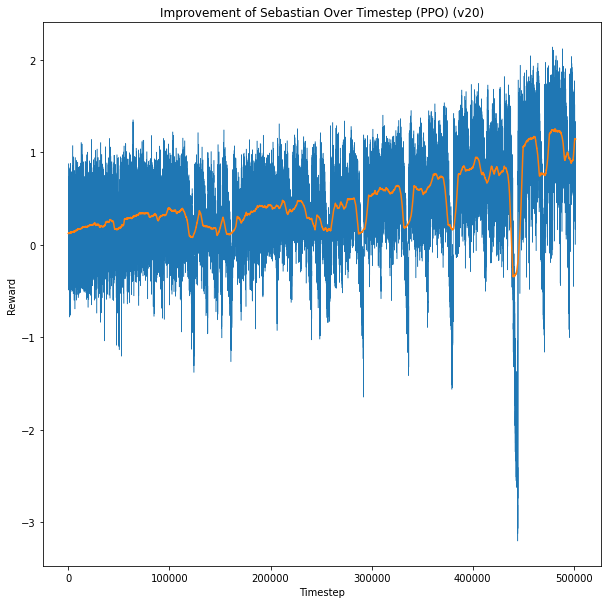

In [18]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.ndimage.filters import uniform_filter1d

%matplotlib inline
N = 10000
plt.rcParams["figure.figsize"]=(10,10)
xs = range(1, len(data) + 1)
plt.plot(xs, data, linewidth = 0.5)
y = uniform_filter1d(data, size=N)
plt.plot(xs, y)
plt.xlabel("Timestep")
plt.ylabel("Reward")
plt.title("Improvement of Sebastian Over Timestep (PPO) (v" + version + ")")
plt.show()

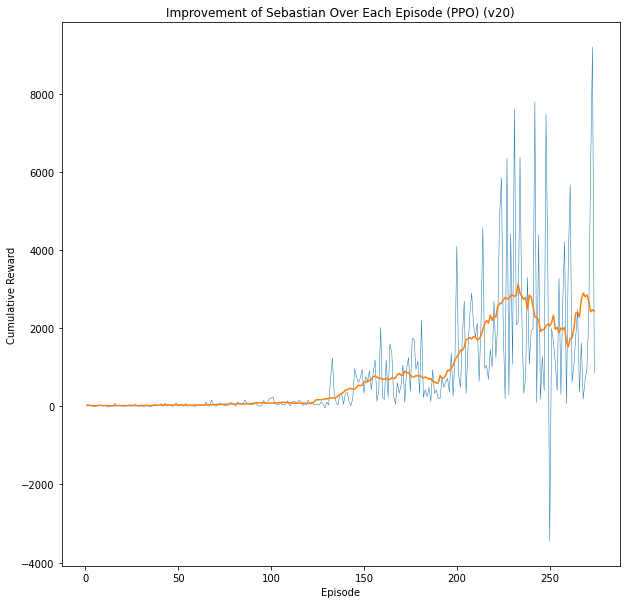

In [19]:
N = 20
plt.rcParams["figure.figsize"]=(10,10)
xs = range(1, len(cum_data) + 1)
plt.plot(xs, cum_data, linewidth = 0.5)
y = uniform_filter1d(cum_data, size=N)
plt.plot(xs, y)
plt.xlabel("Episode")
plt.ylabel("Cumulative Reward")
plt.title("Improvement of Sebastian Over Each Episode (PPO) (v" + version + ")")
plt.show()

In [ ]:
import pandas as pd
df = pd.DataFrame(data = {"timestep":range(1,len(data) + 1), "reward":data, "f_reward":rewards_data[0], 
                          "d_reward":rewards_data[1], "p_reward":rewards_data[2], 
                          "y_reward":rewards_data[3], "c_reward":rewards_data[4]})
df2 = pd.DataFrame(data = {"episode":range(1, len(cum_data) + 1), "cumulative reward": cum_data})

In [21]:
df.to_csv("./data/timestep_rewards/ppo_rewards_v" + version + ".csv")
df2.to_csv("./data/episode_rewards/ppo_cum_rewards_v" + version + ".csv")